# sift特征点检测

# 1. 不同尺度空间

① 在一定的范围内，无论物体是大还是小，人眼都可以分辨出来，然而计算机要有相同的能力却很难，所以要让机器能够对物体在不同尺度下有一个统一的认知，就需要考虑图像在不同的尺度下都存在的特点。

② 尺度空间的获取通常使用高斯模糊来实现。

③ 不同 σ 的高斯函数决定了对图像的平滑程度，越大的 σ 值对应的图像越模糊。

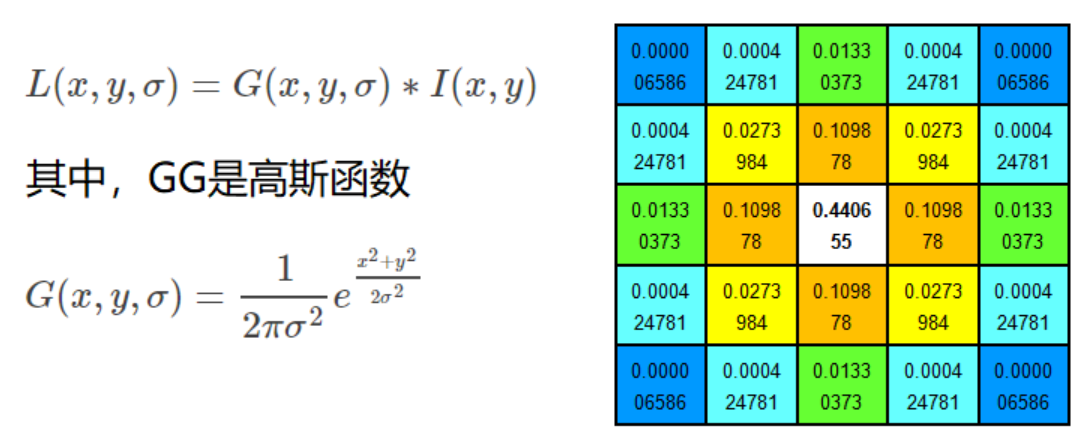

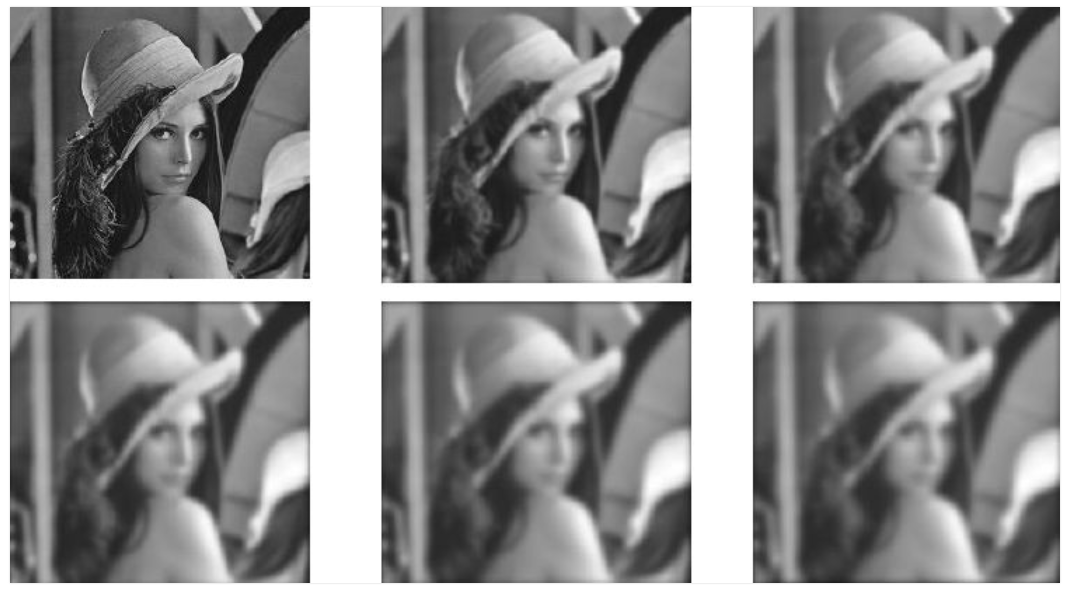

# 2. 多分辨率金字塔

① 第一个是要做一个图像金字塔，第二个是金字塔的每层都要做高斯滤波。

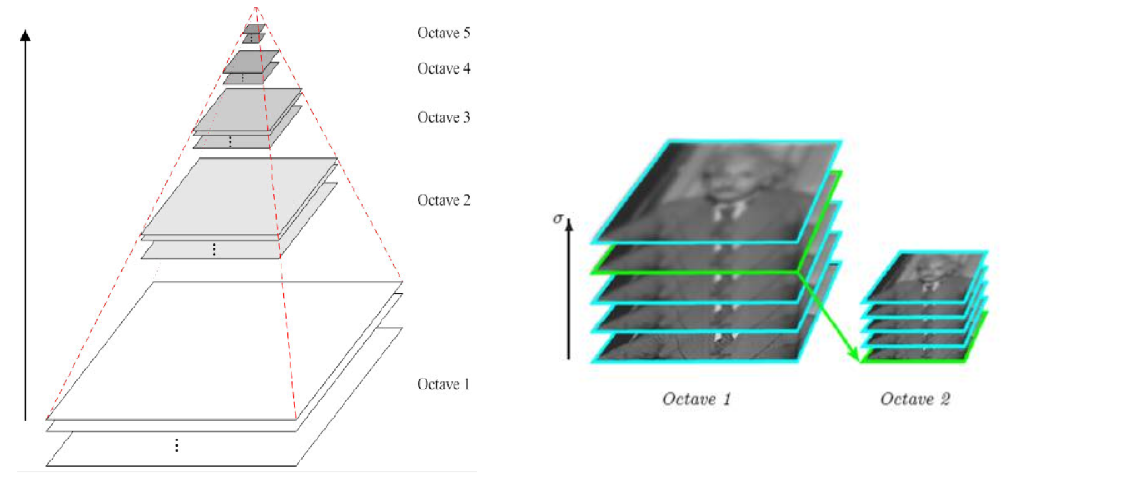

# 3. 高斯差分金字塔 (DOG)

① 差分结果较大的被视为比较重要的特征。

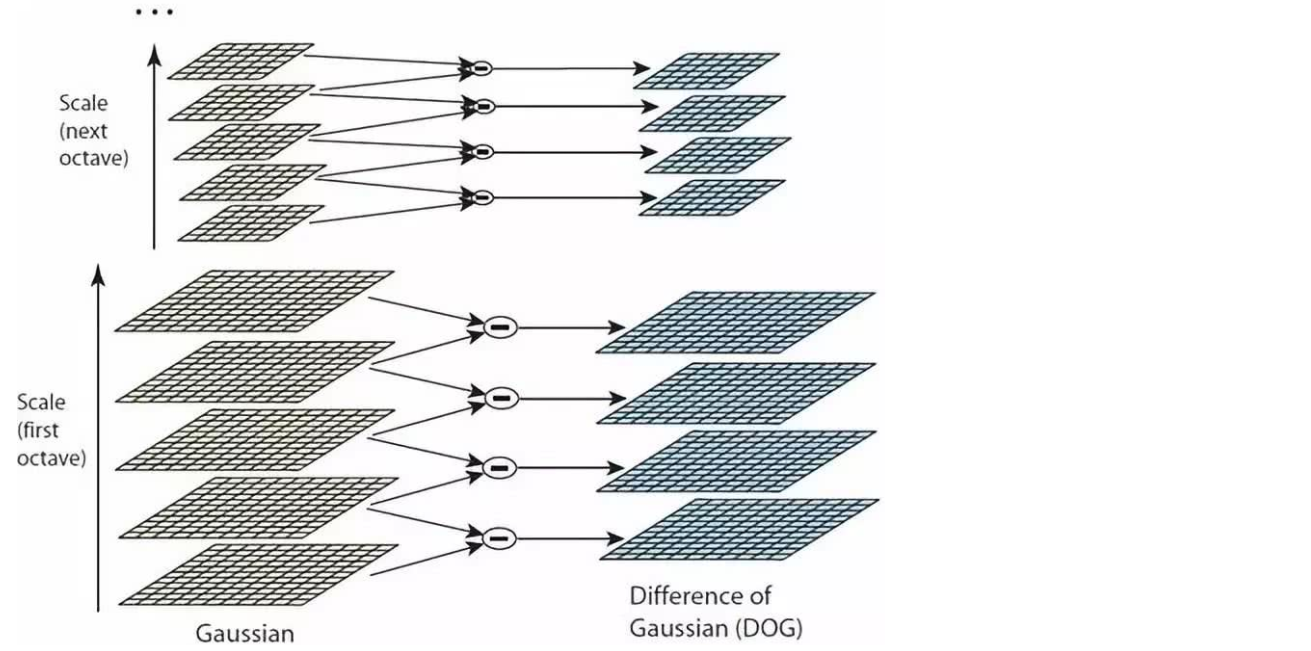

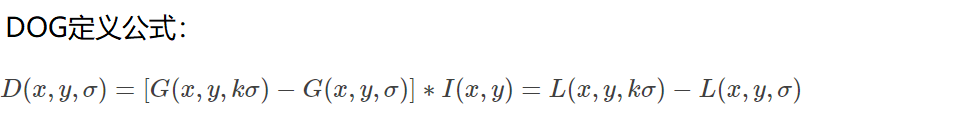

# 4. DOG空间极值检测

① 为了寻找尺度空间的极值点，每个像素点要和其图像域（同一尺度空间）和尺度域（相邻的尺度空间）的所有相邻点进行比较，当其大于（或者小于）所有相邻点时，该点就是极值点。

② 如下图所示，中间的检测点要和其所在图像的3×3邻域8个像素点，以及其相邻的上下两层的3×3领域18个像素点，共26个像素点进行比较。

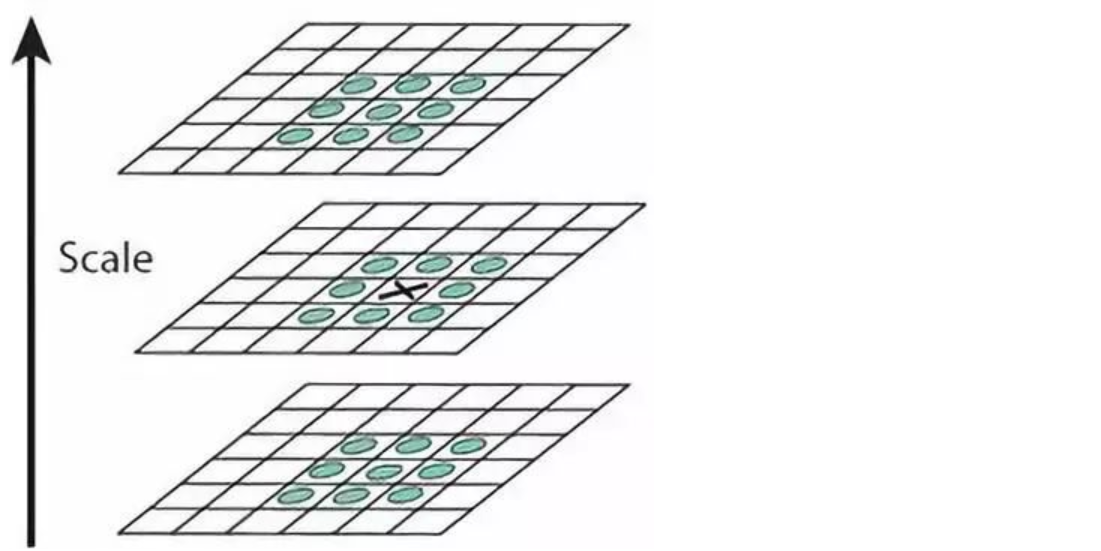

# 5. 关键点的精确定位

① 这些候选关键点是 DOG 空间的局部极值点，而且这些极值点均为离散的点，精确定位极值点的一种方法是，对尺度空间 DOG 函数进行曲线拟合，计算其极值点，从而实现关键点的精确定位。

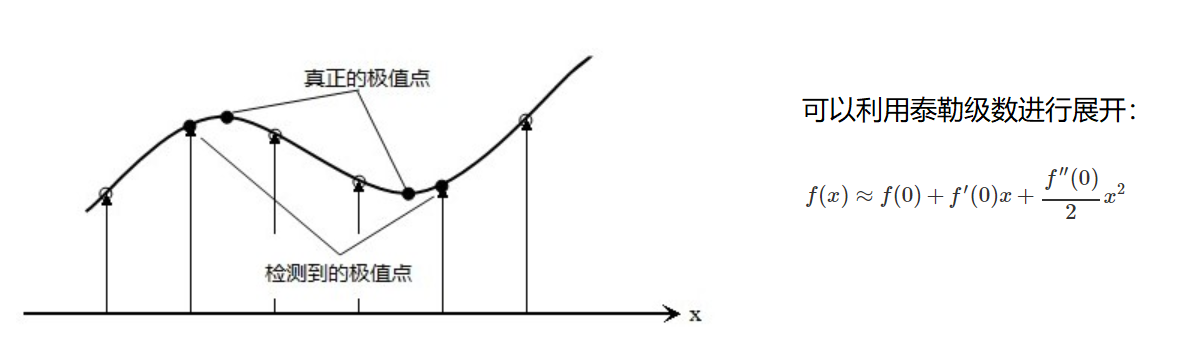

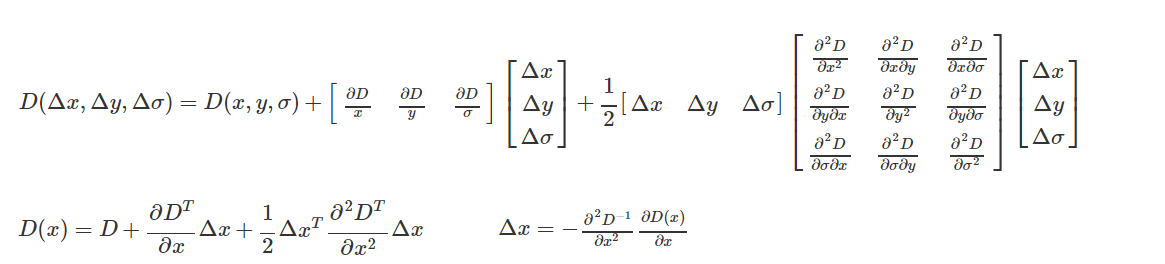

# 6. 消除边界响应

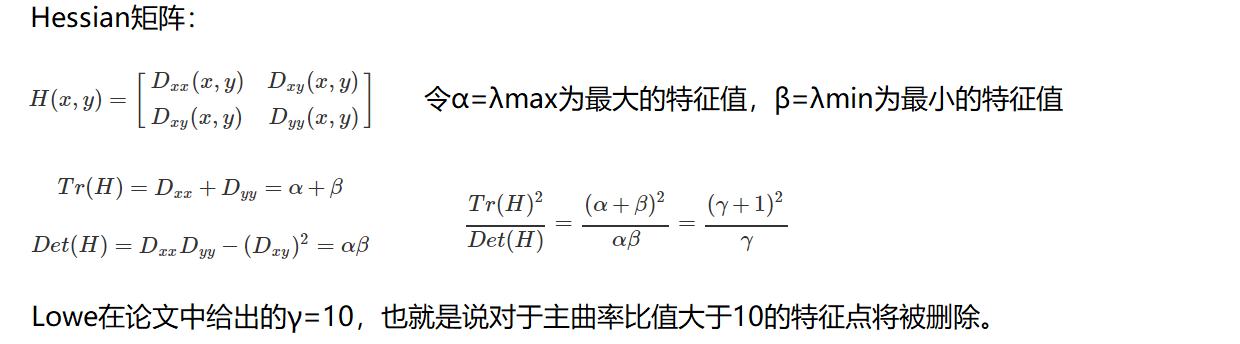

# 7. 特征点的主方向

① 每个特征点可以得到三个信息(x,y,σ,θ)，即位置、尺度和方向。具有多个方向的关键点可以被复制成多份，然后将方向值分别赋给复制后的特征点，一个特征点就产生了多个坐标、尺度相等，但是方向不同的特征点。

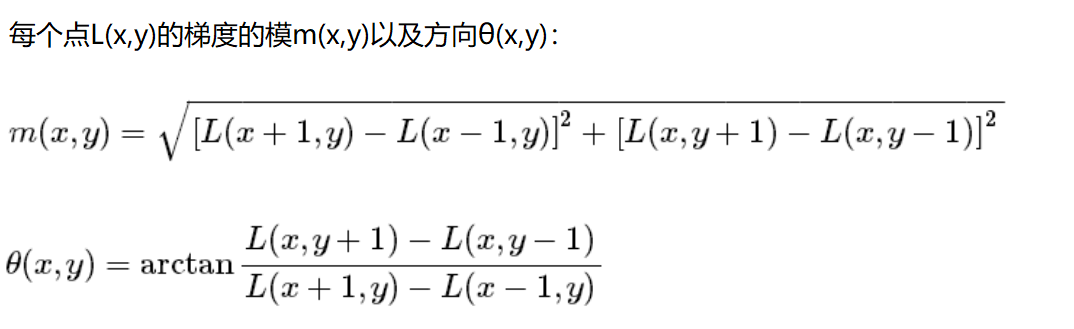

# 8. 生成特征描述

① 在完成关键点的梯度计算后，使用直方图统计邻域内像素的梯度和方向。

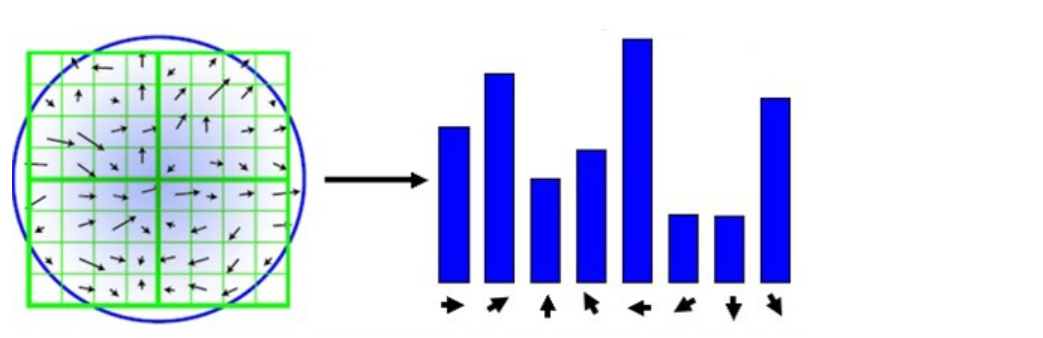

② 为了保证特征矢量的旋转不变性，要以特征点为中心，在附近邻域内将坐标轴旋转θ角度，即将坐标轴旋转为特征点的主方向。

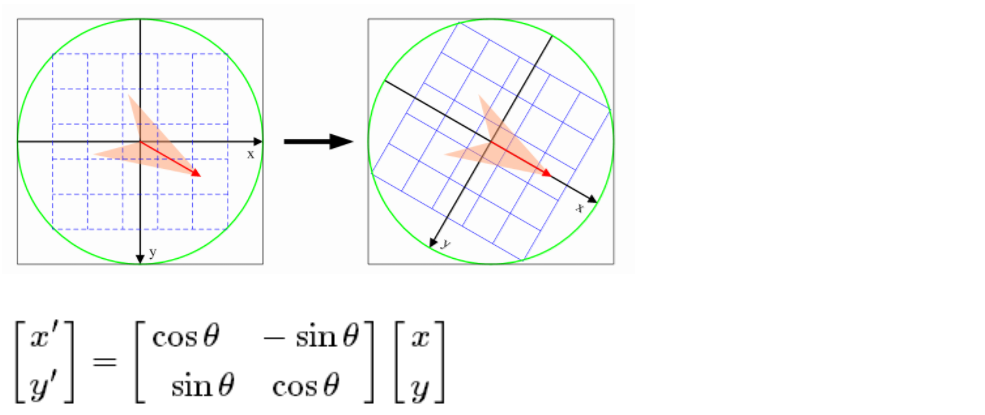

③ 旋转之后的主方向为中心取8x8的窗口，求每个像素的梯度幅值和方向，箭头方向代表梯度方向，长度代表梯度幅值，然后利用高斯窗口对其进行加权运算，最后在每个4x4的小块上绘制8个方向的梯度直方图，计算每个梯度方向的累加值，即可形成一个种子点，即每个特征的由4个种子点组成，每个种子点有8个方向的向量信息。

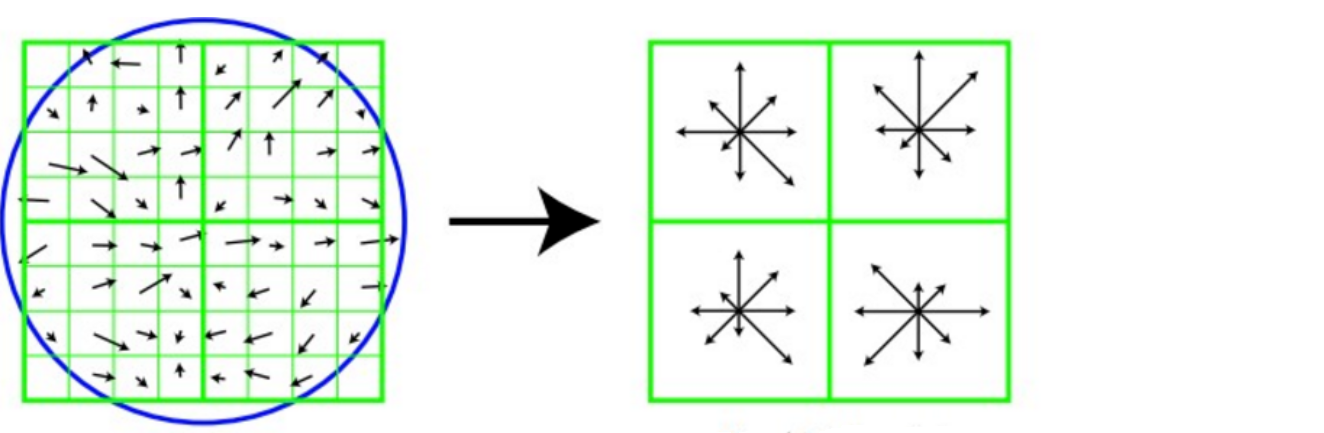

④ 论文中建议对每个关键点使用4x4共16个种子点来描述，这样一个关键点就会产生128维的SIFT特征向量。

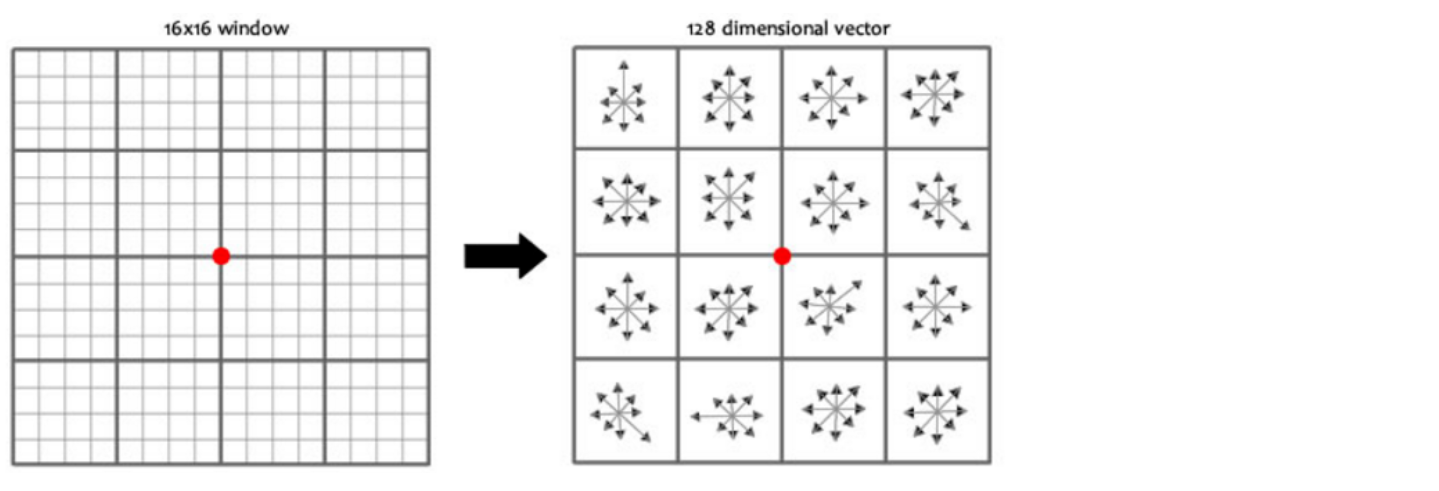

# 9. sift特征点检测

In [1]:
import cv2
import numpy as np

img = cv2.imread('01_Picture/18_House.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(cv2.__version__)

sift = cv2.xfeatures2d.SIFT_create()  # 将 SIFT 算法实例化出来
kp = sift.detect(gray, None) # 把灰度图传进去，得到特征点、关键点

img = cv2.drawKeypoints(gray, kp, img)
cv2.imshow('drawKeypoints', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.4.1


In [2]:
kp, des = sift.compute(gray, kp)
print(np.array(kp).shape) # 6827 个关键点
print(des.shape) # 每个关键点有 128 维向量
print(des[0])    # 获得第 0 号关键点的值

(6827,)
(6827, 128)
[  0.   0.   0.   0.   0.   0.   0.   0.  21.   8.   0.   0.   0.   0.
   0.   0. 157.  31.   3.   1.   0.   0.   2.  63.  75.   7.  20.  35.
  31.  74.  23.  66.   0.   0.   1.   3.   4.   1.   0.   0.  76.  15.
  13.  27.   8.   1.   0.   2. 157. 112.  50.  31.   2.   0.   0.   9.
  49.  42. 157. 157.  12.   4.   1.   5.   1.  13.   7.  12.  41.   5.
   0.   0. 104.   8.   5.  19.  53.   5.   1.  21. 157.  55.  35.  90.
  22.   0.   0.  18.   3.   6.  68. 157.  52.   0.   0.   0.   7.  34.
  10.  10.  11.   0.   2.   6.  44.   9.   4.   7.  19.   5.  14.  26.
  37.  28.  32.  92.  16.   2.   3.   4.   0.   0.   6.  92.  23.   0.
   0.   0.]
